# Assignment 3
### Due 9/21. Do four of five.
#### Chase Cha (yht7nf)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")

/var/folders/dg/qy7075ls2lv5xq69xksqp9180000gn/T/ipykernel_2295/298847443.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("./data/nhanes_data_17_18.csv")


1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
  - Choosing the variables GeneralHealthCondition and HowHealthyIsTheDiet. See missing value investigation below. From the code, it appears that GeneralHealthCondition has 2402 missing values and HowHealthyIsTheDiet has 2540 missing values out of a total 8366 rows/observations.
- Compute a contingency table for your categorical $X$ and $Y$
  - See both contigency tables below.
- Discuss any interesting patterns (or lack of one) that you observe
  - See discussion below contigency tables.

In [4]:
nhanes['general_health_na'] = nhanes['GeneralHealthCondition'].isna()
nhanes['healthy_diet_na'] = nhanes['HowHealthyIsTheDiet'].isna()

print(nhanes['general_health_na'].value_counts())
print(nhanes['healthy_diet_na'].value_counts())

general_health_na
False    5964
True     2402
Name: count, dtype: int64
healthy_diet_na
False    5826
True     2540
Name: count, dtype: int64


In [5]:
pd.crosstab(nhanes['HowHealthyIsTheDiet'], nhanes['GeneralHealthCondition'])

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
HowHealthyIsTheDiet,,,,,
Excellent,141,45,109,5,103
Fair,54,516,631,57,200
Good,120,318,1109,43,537
Poor,11,167,114,53,30
Very good,174,87,298,11,482


In [6]:
pd.crosstab(nhanes['HowHealthyIsTheDiet'], nhanes['GeneralHealthCondition'], normalize="columns")

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
HowHealthyIsTheDiet,,,,,
Excellent,0.282,0.039718,0.048209,0.029586,0.076183
Fair,0.108,0.455428,0.279080,0.337278,0.147929
Good,0.240,0.280671,0.490491,0.254438,0.397189
Poor,0.022,0.147396,0.050420,0.313609,0.022189
Very good,0.348,0.076787,0.131800,0.065089,0.356509


Based on the above contigency tables, we can see some interesting patterns regarding the relationship between a healthy diet and the general health condition. First, those with an excellent helath condition rated their diet either Excellent, Very Good, or Good with very few people listing fair or poor. This does show a correlation between a better diet and a higher health condition. Similarly, those with Poor health conditions rated their diets either Fair, Good, or Poor, with very few people saying their diet was Excellent or Very Good.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
  - For this question I will choose the categorical variable GeneralHealthCondition and the numeric variable CurrentSelfreportedWeightPounds to see if those with better health conditions report lower weights. See missing value investigation below. From the code, self reported weight has a total of 2538 missing values out of 8366. As discussed above, GeneralHealthCondition has 2402 missing values.
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
  - In making the kde plots and descriptive tables, I noticed that some self reported weights are 9999 or 7777 pounds, which I believe to be missing value indicators since no person should weigh that much. Thus, before making the plots I replace all 9999 and 7777 values in the reported weight column with `np.nan` missing values. After doing so, the plots are much more clear and easier to interpret.
- Discuss any interesting patterns (or lack of one) that you observe
  - See discussion below plots

In [7]:
nhanes['weight_na'] = nhanes['CurrentSelfreportedWeightPounds'].isna()

print(nhanes['weight_na'].value_counts())
print(nhanes['general_health_na'].value_counts())

weight_na
False    5828
True     2538
Name: count, dtype: int64
general_health_na
False    5964
True     2402
Name: count, dtype: int64


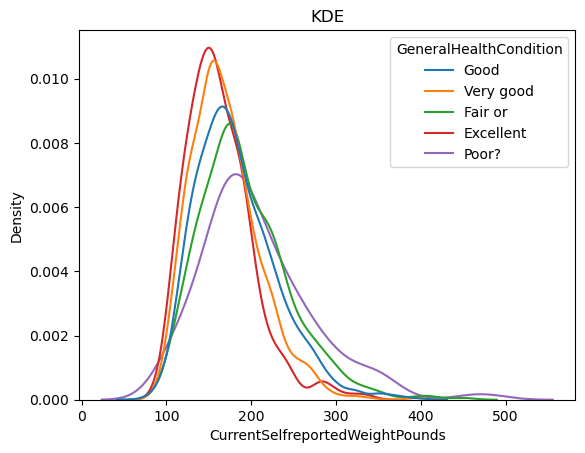

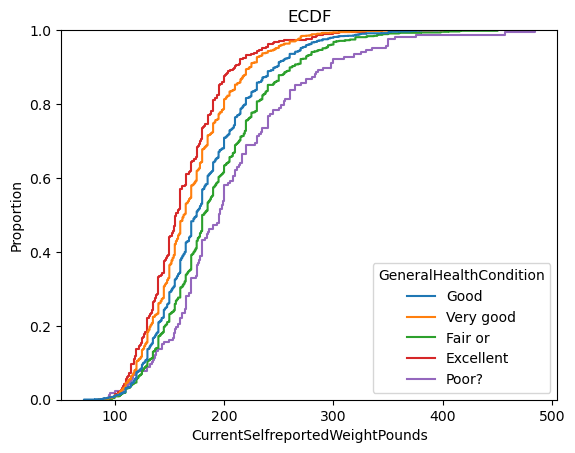

CurrentSelfreportedWeightPounds                         \
                                                 count        mean        std   
GeneralHealthCondition                                                          
Excellent                                        492.0  162.469512  39.620258   
Fair or                                         1100.0  191.737273  53.341340   
Good                                            2226.0  181.793351  48.183931   
Poor?                                            167.0  205.904192  66.251823   
Very good                                       1342.0  169.307750  41.309565   

                                                           
                         min     25%    50%    75%    max  
GeneralHealthCondition                                     
Excellent               90.0  135.00  156.0  185.0  338.0  
Fair or                 86.0  155.00  180.5  220.0  450.0  
Good                    72.0  147.25  175.0  210.0  400.0  
Poor?                   95.0  165.00  195.0  240.0  484.0  
Very good               85.0  140.00  163.5  191.0  400.0

In [8]:
#replacing 9999 and 7777 with np.nan since these appear to be numeric missing codes (no person should weigh this much)
nhanes.replace({'CurrentSelfreportedWeightPounds': [9999, 7777]}, np.nan, inplace=True)

conditioner = 'GeneralHealthCondition'
sns.kdeplot( data=nhanes, x='CurrentSelfreportedWeightPounds', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes, x='CurrentSelfreportedWeightPounds', hue=conditioner).set(title='ECDF')
plt.show()
nhanes.loc[:,['CurrentSelfreportedWeightPounds', conditioner]].groupby(conditioner).describe()

#### Answer
Based on the above KDE/ECDF plots and the grouped summary, I believe there to be a relationship between reported weight and the general health condition. When looking at the KDE/ECDF plots, sweeping from left to right we hit the curves in order of General Health Condition from Excellent to poor, meaning those with an excellent health condition are more concentrated at lower reported weights and accumulate faster at these lower weights than those with lower health conditions. Based on the grouped summary, we see that the mean weight is lower for better health conditions, further strengthing the relationship between weight and health condition.

3. 
### Skipping this question since instructions say to do four of five.
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
  - See code below. Using the Gaussian kernel to compute LCLS
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.
  - See plots and discussion below. From ames data set analyzing the relationship between price and first floor square feet to see if price of homes increase with square feet.

In [26]:
def lcls(x, y):
  n = len(x)
  grid = np.sort(x.unique()) # Extract and sort unique values for x

  # Compute bandwidth using Silverman plug-in:
  iqr = np.quantile(x,.75) - np.quantile(x,.25)
  h = 0.9 * min(np.std(x), iqr/1.34) * n **(-0.2)
  print(f'Computed bandwidth is: {h}')

  # Compute kernel:
  I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
  K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

  # Compute LCLS estimator:
  numerator = y@K # Compute the numerator
  denominator = np.sum(K,axis=0) # Compute denominator
  y_hat = numerator/denominator # Compute estimator

  return y_hat, grid

Computed bandwidth is: 69.08982920537302


<Axes: xlabel='X1st.Flr.SF', ylabel='price'>

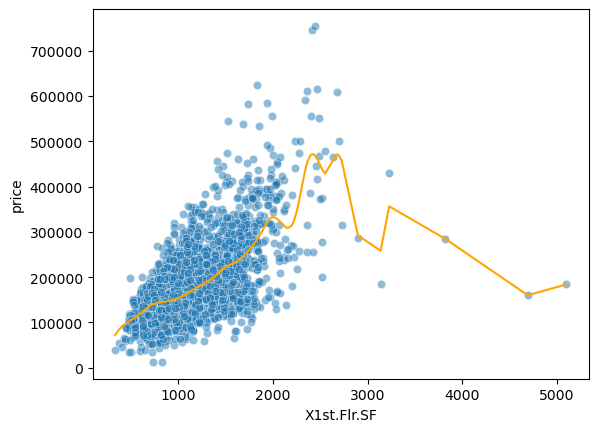

In [36]:
#Plot LCLS for two numeric variables from ames dataset.
ames = pd.read_csv("./data/ames_prices.csv")

x = ames['X1st.Flr.SF']
y = ames['price']

y_hat, grid = lcls(x, y)

sns.scatterplot(data=ames, y='price', x='X1st.Flr.SF', alpha=0.5)
sns.lineplot(x=grid, y=y_hat, color='orange')

#### Discussion
Based on the above plot, I would say that there does appear to be a positive linear relationship between price and first floor square feet, and that our LCLS estimator is reliable up to around 2500 square feet. However, for the larger square foot houses where we have fewer data points, the estimator does not seem to be as reliable since it follows the few data points too closely instead of following the general trend of the data.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
  - Investigating relationship between Total basement square footage on price from the ames data set. See scatterplot and CEF below. Relationship appears to be linear.
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
  - I believe there are missing/omitted variables that might explain part of the relationship shown between my variables. Since houses with a larger total basement square footage are also likely to be larger houses with more land, bathrooms, bedrooms, floors, etc. it does make sense that a larger basement would correlate to a higher price. However, the increase in price cannot be fully attributed to the larger basement square footage due to these threats to causal identification, meaning we cannot pinpoint the exact effect of $X$ on $Y$ from the CEF.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome
  - Since the CEF simply describes how $Y$ is distributed/the mean of $Y$ when $X$ takes on a particular value, it can be used as a predictor in the sense that it provides the best estimate of $Y$ conditioned on $X$ by minimizing the mean squared error. If we were to intervene and claim a change in basement size will result in a certain increase in price, all else constant, then the omitted variables would cause a problem as we cannot solely isolate the effect of $X$ or basement size on $Y$. For prediciton, however, given that we observe $X=x$ determining what $Y$ we should expect is valid since we are not intervening and just conditioning. In other words, the CEF will capture the effect of all the variables that might explain the relationship between $Y$ and $X$, but we cannot pinpoint or determine how much an explicit change in $X$ will affect $Y$.

In [34]:
def nbhd_mean(x,y,h=81):
    ''' Computes local constant least squares regression estimates with uniform kernel. '''
    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x
    I = np.abs( x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) ) <= h # Compute the kernel
    numerator = y@I/(2*h) # Compute the numerator
    denominator = np.sum(I,axis=0)/(2*h) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    return y_hat, grid

/var/folders/dg/qy7075ls2lv5xq69xksqp9180000gn/T/ipykernel_92793/106454601.py:8: RuntimeWarning: invalid value encountered in divide
  y_hat = numerator/denominator # Compute estimator


<Axes: xlabel='Total.Bsmt.SF', ylabel='price'>

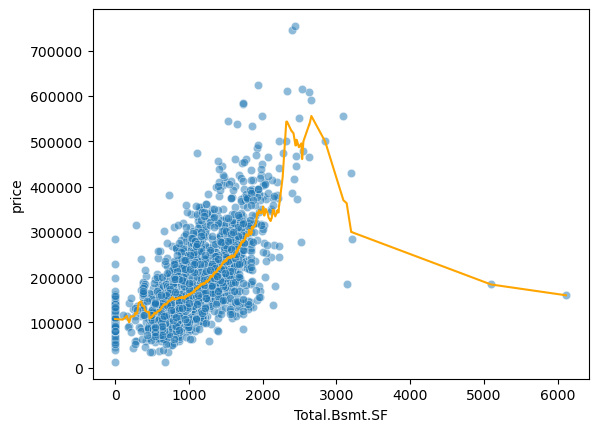

In [38]:
x = ames['Total.Bsmt.SF']
y = ames['price']

y_hat, grid = nbhd_mean(x, y)

sns.scatterplot(data=ames, y='price', x='Total.Bsmt.SF', alpha=0.5)
sns.lineplot(x=grid, y=y_hat, color='orange')